In [1]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns    
import numpy as np
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
  
import pickle  
from pathlib import Path  
  

In [2]:
# Importing Data Source

df = pd.read_csv(r'C:\Users\fikri\Desktop\pyproj\vidio.com\213.csv',error_bad_lines=False)
print(df.shape)
print(df.columns)
print(df.head())
print(df.info(verbose=True))


b'Skipping line 7655: expected 41 fields, saw 42\n'
b'Skipping line 28027: expected 41 fields, saw 49\nSkipping line 29868: expected 41 fields, saw 42\n'
b'Skipping line 41317: expected 41 fields, saw 49\n'
b'Skipping line 50334: expected 41 fields, saw 42\nSkipping line 57183: expected 41 fields, saw 42\nSkipping line 61465: expected 41 fields, saw 49\n'
b'Skipping line 68522: expected 41 fields, saw 49\nSkipping line 74582: expected 41 fields, saw 42\n'
b'Skipping line 83509: expected 41 fields, saw 42\nSkipping line 94944: expected 41 fields, saw 42\n'
b'Skipping line 130829: expected 41 fields, saw 42\n'
b'Skipping line 163627: expected 41 fields, saw 42\n'
b'Skipping line 185137: expected 41 fields, saw 42\n'
b'Skipping line 197897: expected 41 fields, saw 42\nSkipping line 206057: expected 41 fields, saw 42\n'
b'Skipping line 213623: expected 41 fields, saw 42\nSkipping line 216084: expected 41 fields, saw 42\nSkipping line 227679: expected 41 fields, saw 49\n'
b'Skipping line 25

(742582, 41)
Index(['hash_content_id', 'hash_play_id', 'hash_visit_id', 'hash_watcher_id',
       'hash_film_id', 'hash_event_id', 'is_login', 'playback_location',
       'platform', 'play_time', 'end_time', 'referrer', 'average_bitrate',
       'bitrate_range', 'total_bytes', 'buffer_duration', 'referrer_group',
       'completed', 'utm_source', 'utm_medium', 'utm_campaign', 'player_name',
       'has_ad', 'flash_version', 'os_name', 'os_version', 'browser_name',
       'browser_version', 'app_name', 'autoplay', 'is_premium', 'app_version',
       'city', 'play_duration', 'content_type', 'stream_type', 'title',
       'category_name', 'film_title', 'season_name', 'genre_name'],
      dtype='object')
                                     hash_content_id  \
0  003f6dad4ab48a4e39ea262b19e3b42a4b53c2175078b3...   
1  0079c67ae8c7f6cbd44768f1988196c137326f3058d995...   
2  0079c67ae8c7f6cbd44768f1988196c137326f3058d995...   
3  0079c67ae8c7f6cbd44768f1988196c137326f3058d995...   
4  0079c67

In [3]:
droplist = ['referrer','average_bitrate','bitrate_range','utm_source','utm_medium','utm_campaign','flash_version','os_version'
            ,'browser_version','app_version','city','player_name']
df=df.drop(droplist, axis=1)

In [4]:
#null value check!

for col in df:
    print("row kosong pada kolom {}, {}".format(col, df[col].isnull().sum()))

row kosong pada kolom hash_content_id, 0
row kosong pada kolom hash_play_id, 0
row kosong pada kolom hash_visit_id, 0
row kosong pada kolom hash_watcher_id, 0
row kosong pada kolom hash_film_id, 702057
row kosong pada kolom hash_event_id, 0
row kosong pada kolom is_login, 0
row kosong pada kolom playback_location, 0
row kosong pada kolom platform, 0
row kosong pada kolom play_time, 0
row kosong pada kolom end_time, 0
row kosong pada kolom total_bytes, 0
row kosong pada kolom buffer_duration, 0
row kosong pada kolom referrer_group, 0
row kosong pada kolom completed, 271020
row kosong pada kolom has_ad, 0
row kosong pada kolom os_name, 235324
row kosong pada kolom browser_name, 234709
row kosong pada kolom app_name, 0
row kosong pada kolom autoplay, 271167
row kosong pada kolom is_premium, 0
row kosong pada kolom play_duration, 0
row kosong pada kolom content_type, 0
row kosong pada kolom stream_type, 471562
row kosong pada kolom title, 0
row kosong pada kolom category_name, 271020
row k

In [5]:
# labeling categorical column
df['platform'] = df['platform'].replace(['tv-android','tv-tizen','tv-webos','app-android','app-ios'],['SmartTV','SmartTV','SmartTV','appmobile_user','appmobile_user'])
df_new = df[['is_login','is_premium','platform']]


df_new['is_login']= df_new['is_login'].astype('object')
df_new['is_premium'] = df_new['is_premium'].astype('object')
df_encode = df_new.copy()    

print(df_encode.info())
print(df_encode.describe())
print(df_encode['platform'].value_counts())

<ipython-input-5-91621a0232a8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['is_login']= df_new['is_login'].astype('object')
<ipython-input-5-91621a0232a8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['is_premium'] = df_new['is_premium'].astype('object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742582 entries, 0 to 742581
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   is_login    742582 non-null  object
 1   is_premium  742582 non-null  object
 2   platform    742582 non-null  object
dtypes: object(3)
memory usage: 8.5+ MB
None
       is_login is_premium    platform
count    742582     742582      742582
unique        2          2           4
top       False      False  web-mobile
freq     572330     736174      428312
web-mobile        428312
appmobile_user    193330
web-desktop        71340
SmartTV            49600
Name: platform, dtype: int64


In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_encode = df_encode.apply(le.fit_transform)
print(df_encode.head())

   is_login  is_premium  platform
0         1           0         0
1         0           0         3
2         0           0         3
3         0           0         3
4         0           0         3


In [ ]:
cost = []
for num_clusters in list(range(1,14)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df_encode)
    cost.append(kmode.cost_)

In [ ]:
y = np.array([i for i in range(1,14,1)])
plt.plot(y,cost)

In [7]:
km_cao = KModes(n_clusters=12, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df_encode)
print(fitClusters_cao)




Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 6278.0
[9 0 0 ... 0 0 0]


In [8]:
## Combining predictied cluster to original DF
df_encode = df_encode.reset_index()
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index'], axis = 1)
print(combinedDf.head())


                                     hash_content_id  \
0  003f6dad4ab48a4e39ea262b19e3b42a4b53c2175078b3...   
1  0079c67ae8c7f6cbd44768f1988196c137326f3058d995...   
2  0079c67ae8c7f6cbd44768f1988196c137326f3058d995...   
3  0079c67ae8c7f6cbd44768f1988196c137326f3058d995...   
4  0079c67ae8c7f6cbd44768f1988196c137326f3058d995...   

                                        hash_play_id  \
0  515dd4d7af23ae9ef5a2455bc97ee765fe86224ebaca71...   
1  047f7b21bcb1a57119229958b11abe364ce1a279f8ae00...   
2  2623b2970635a15f1cf12bf9aa1e4d545135593e6a860c...   
3  4850defe8308149c097ff7adfe6fbdab1385a4d2ea7038...   
4  ae0cb715407a6694fb052f4d25b9c87e97ab6ccafdb388...   

                                       hash_visit_id  \
0  ed8d97adbba52562575973553003d9a13b103bc4693a6c...   
1  88a404df574ba3c637bb99e94a2e51b16114f5da6f99cd...   
2  24abc04f114c9cb0c2087568093a909f04b3a567041fff...   
3  f1279ae82e3c45f7591ad8e43f69a87d7444bf1c4b70b1...   
4  151db218c9cbad4d9fa1b1196fd998a63a831469858

In [9]:
#shortlistedDF
df_short = combinedDf[['hash_content_id','is_login','is_premium','platform','cluster_predicted']]
print(df_short.head())

print(df_short['cluster_predicted'].value_counts())


                                     hash_content_id  is_login  is_premium  \
0  003f6dad4ab48a4e39ea262b19e3b42a4b53c2175078b3...      True       False   
1  0079c67ae8c7f6cbd44768f1988196c137326f3058d995...     False       False   
2  0079c67ae8c7f6cbd44768f1988196c137326f3058d995...     False       False   
3  0079c67ae8c7f6cbd44768f1988196c137326f3058d995...     False       False   
4  0079c67ae8c7f6cbd44768f1988196c137326f3058d995...     False       False   

     platform  cluster_predicted  
0     SmartTV                  9  
1  web-mobile                  0  
2  web-mobile                  0  
3  web-mobile                  0  
4  web-mobile                  0  
0     423753
1     147153
4      67653
3      46147
5      34647
9      14870
6       4547
8       3682
11        83
2         30
7         12
10         5
Name: cluster_predicted, dtype: int64


In [12]:
# show data with clustering
for i in range (0,12):  
    print('\n cluster: {}\n'.format(i))  
    print(df_short[df_short['cluster_predicted']== i].head())



Pelanggan cluster: 0

                                     hash_content_id  is_login  is_premium  \
1  0079c67ae8c7f6cbd44768f1988196c137326f3058d995...     False       False   
2  0079c67ae8c7f6cbd44768f1988196c137326f3058d995...     False       False   
3  0079c67ae8c7f6cbd44768f1988196c137326f3058d995...     False       False   
4  0079c67ae8c7f6cbd44768f1988196c137326f3058d995...     False       False   
5  0079c67ae8c7f6cbd44768f1988196c137326f3058d995...     False       False   

     platform  cluster_predicted  
1  web-mobile                  0  
2  web-mobile                  0  
3  web-mobile                  0  
4  web-mobile                  0  
5  web-mobile                  0  

Pelanggan cluster: 1

                                       hash_content_id  is_login  is_premium  \
7    010883cf416654b1c0210eb98052c8bbc4145639505cae...      True       False   
8    010883cf416654b1c0210eb98052c8bbc4145639505cae...      True       False   
151  0836efba157a44fa60a6d340e3197b

In [16]:
# show unique data with clustering
checkcol = ['is_login','is_premium','platform']
for i in range (0,12):  
    print('\ cluster: {}\n'.format(i))
    for col in checkcol:
        print('\ col value: {}\n'.format(col))
        print(df_short[col][df_short['cluster_predicted']== i].value_counts())

\ cluster: 0

\ col value: is_login

False    423753
Name: is_login, dtype: int64
\ col value: is_premium

False    423753
Name: is_premium, dtype: int64
\ col value: platform

web-mobile    423753
Name: platform, dtype: int64
\ cluster: 1

\ col value: is_login

True    147153
Name: is_login, dtype: int64
\ col value: is_premium

False    142632
True       4521
Name: is_premium, dtype: int64
\ col value: platform

appmobile_user    147153
Name: platform, dtype: int64
\ cluster: 2

\ col value: is_login

False    30
Name: is_login, dtype: int64
\ col value: is_premium

True    30
Name: is_premium, dtype: int64
\ col value: platform

appmobile_user    30
Name: platform, dtype: int64
\ cluster: 3

\ col value: is_login

False    46147
Name: is_login, dtype: int64
\ col value: is_premium

False    46147
Name: is_premium, dtype: int64
\ col value: platform

appmobile_user    46147
Name: platform, dtype: int64
\ cluster: 4

\ col value: is_login

False    67653
Name: is_login, dtype: int64


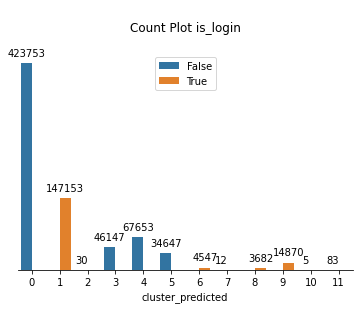

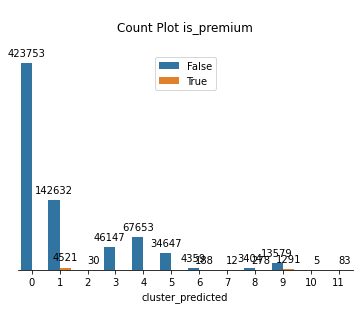

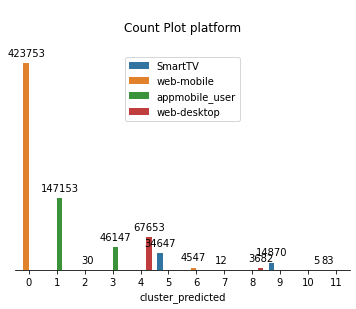

In [17]:
  
for i in checkcol:  
    plt.figure(figsize=(6,4))  
    ax = sns.countplot(data = df_short, x = 'cluster_predicted', hue = i )  
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)  
    ax.legend(loc="upper center")  
    for p in ax.patches:  
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                     ha = 'center',  
                     va = 'center',  
                     xytext = (0, 10),  
                     textcoords = 'offset points')  
      
    sns.despine(right=True,top = True, left = True)  
    ax.axes.yaxis.set_visible(False)  
    plt.show()  

In [20]:
# Mapping cluster 
df_short['Segmen'] = df_short['cluster_predicted'].map({  
    0: '[Web-mobile]Regular non-Member',  
    1: '[App-User]Regular Member',  
    2: '[App-User]Premium non-Member',  
    3: '[App-User]Regular non-Member',  
    4: '[Web-Desktop]Regular non-Member',
    5: '[TV-User]Regular non-Member',  
    6: '[Web-mobile]Regular Member',
    7: '[Web-mobile]Premium non-Member',  
    8: '[Web-Desktop]Regular Member',
    9: '[TV-User]Regular Member',  
    10: '[Web-Desktop]Premium non-Member',  
    11: '[TV-User]Premium non-Member'
})  

print(df_short.info())
print(df_short.head())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742582 entries, 0 to 742581
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   hash_content_id    742582 non-null  object
 1   is_login           742582 non-null  bool  
 2   is_premium         742582 non-null  bool  
 3   platform           742582 non-null  object
 4   cluster_predicted  742582 non-null  uint16
 5   Segmen             742582 non-null  object
dtypes: bool(2), object(3), uint16(1)
memory usage: 11.3+ MB
None
                                     hash_content_id  is_login  is_premium  \
0  003f6dad4ab48a4e39ea262b19e3b42a4b53c2175078b3...      True       False   
1  0079c67ae8c7f6cbd44768f1988196c137326f3058d995...     False       False   
2  0079c67ae8c7f6cbd44768f1988196c137326f3058d995...     False       False   
3  0079c67ae8c7f6cbd44768f1988196c137326f3058d995...     False       False   
4  0079c67ae8c7f6cbd44768f1988196c137326f3058d995.

<ipython-input-20-a9f9a4e0407b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short['Segmen'] = df_short['cluster_predicted'].map({


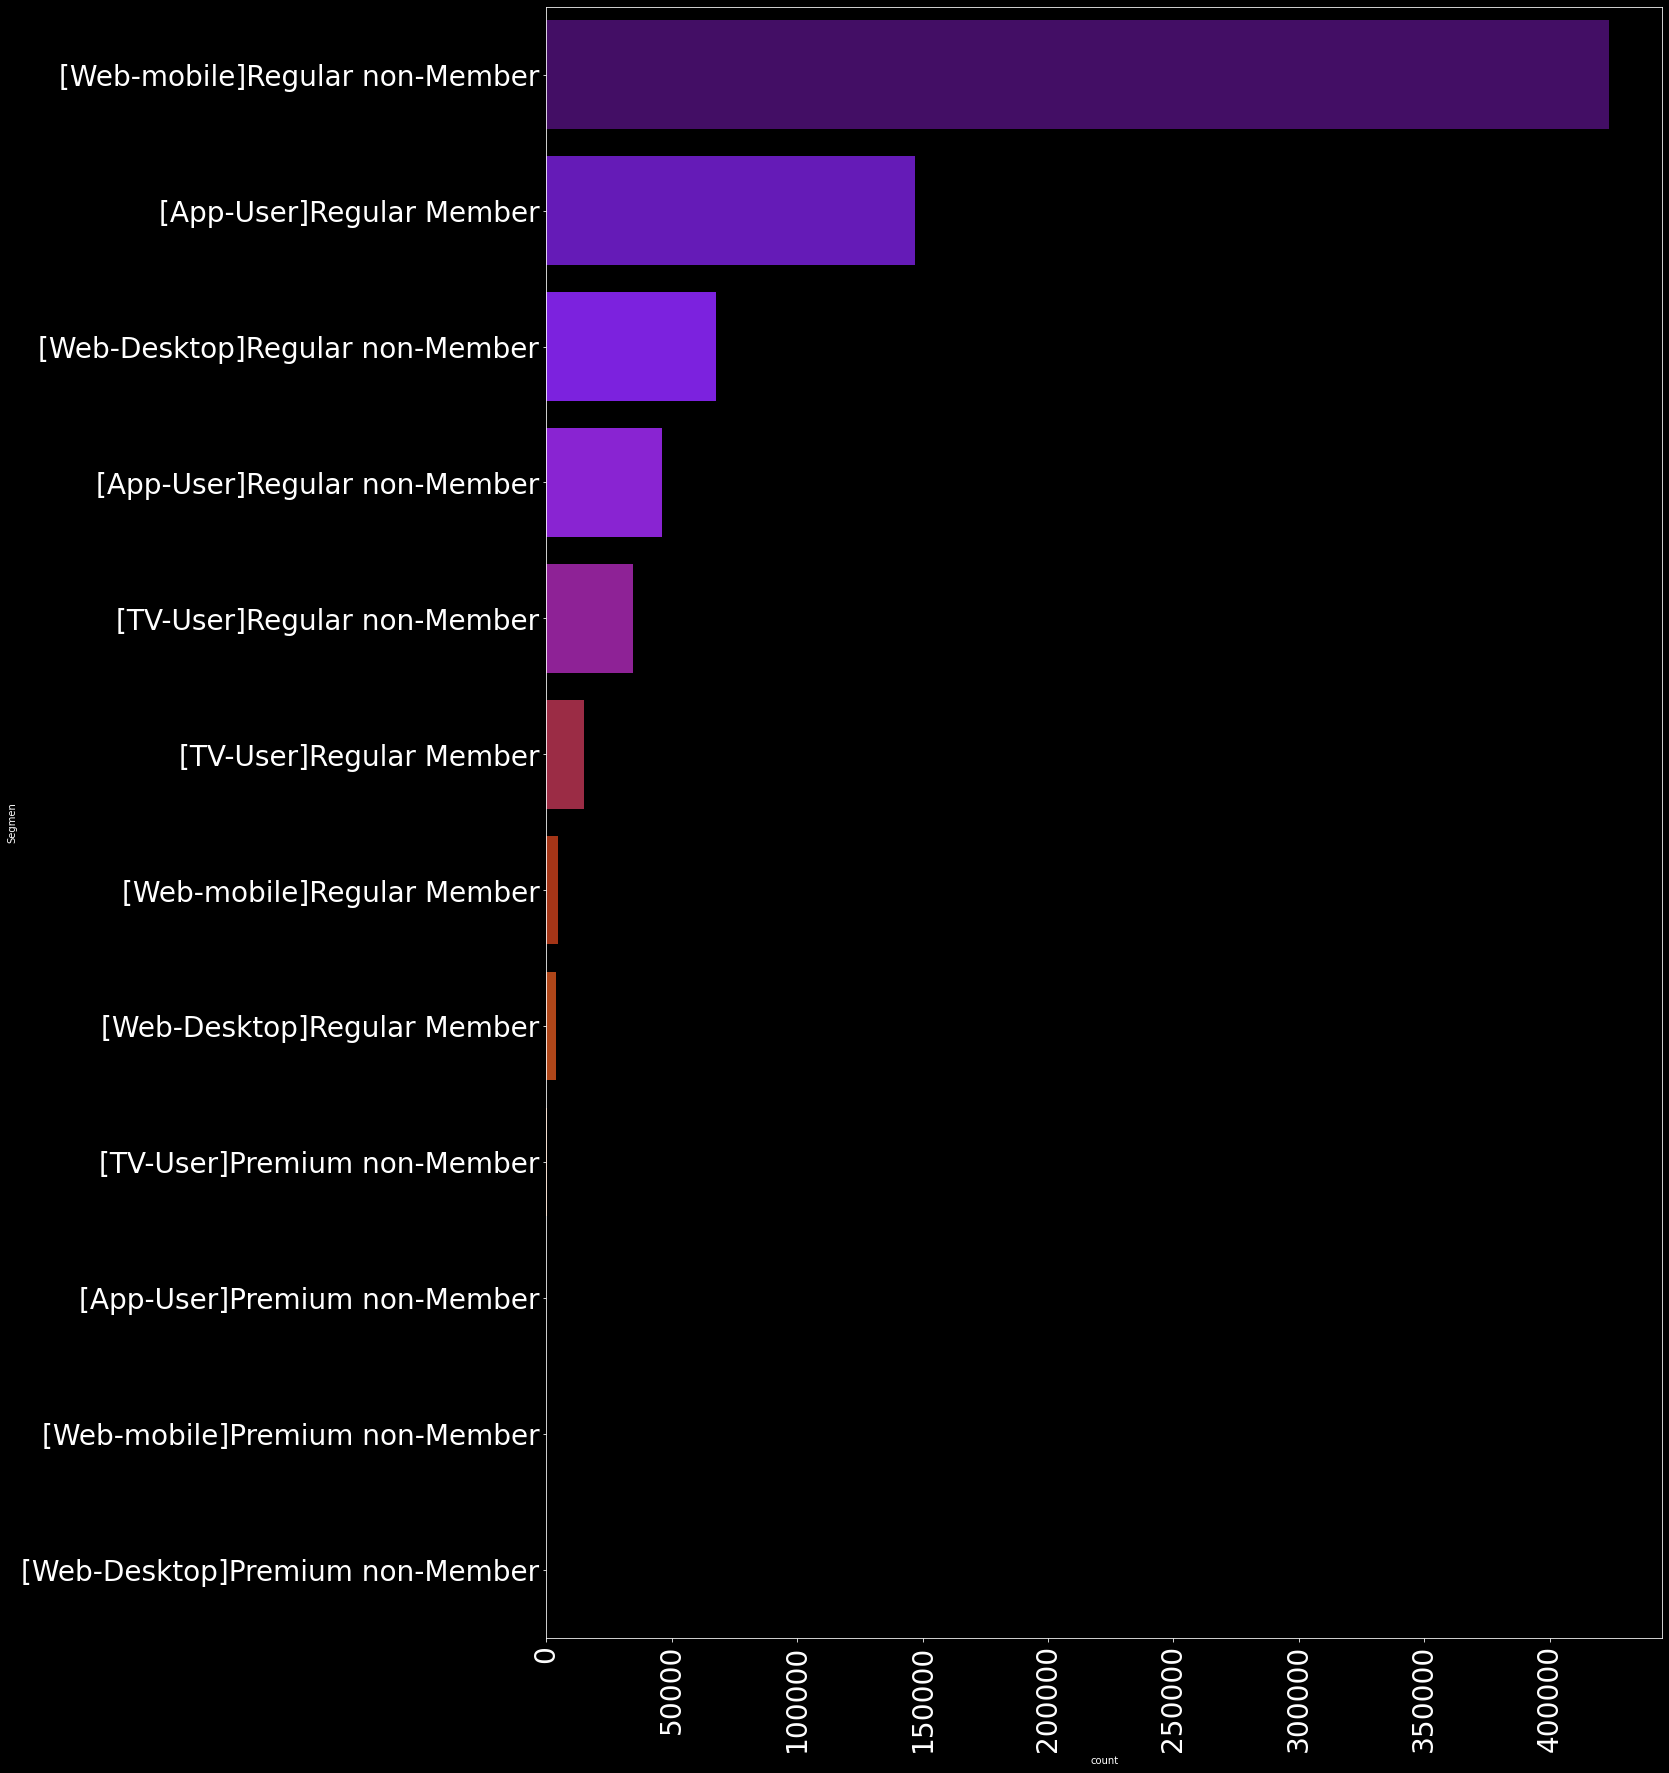

In [26]:
plt.rcParams['figure.figsize']=(20, 30)
plt.style.use('dark_background')
sns.countplot(y='Segmen' , data=df_short ,palette = 'gnuplot',order = df_short['Segmen'].value_counts().index)
plt.xticks(rotation=90, fontsize=28)
plt.yticks( fontsize=28)
plt.show()